# Setup

In [42]:
%run setup.ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

def svm_classifier(X_train, y_train, X_test, y_test):
    clf = SVC()
    clf.fit(X_train, y_train)
    # training accuracy
    print('Training accuracy: ', clf.score(X_train, y_train))
    # confusion matrix
    y_pred = clf.predict(X_test)
    return confusion_matrix(y_test, y_pred)

In [44]:
from sklearn.model_selection import train_test_split

X = heart_failure_df.drop(target_col_name, axis=1)
encode_categorical_features(X)
y = heart_failure_df[target_col_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts(), y_test.value_counts()

(HeartDisease
 1    344
 0    298
 Name: count, dtype: int64,
 HeartDisease
 1    164
 0    112
 Name: count, dtype: int64)

Training accuracy:  0.721183800623053


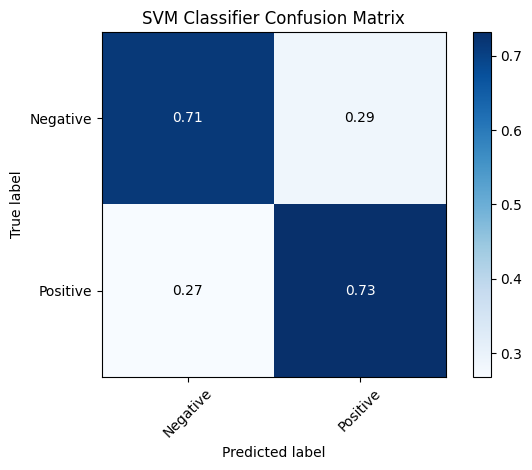

In [45]:
cm = svm_classifier(X_train, y_train, X_test, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'SVM Classifier Confusion Matrix')

### Try scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standard_scaled = scaler.fit_transform(X_train)
X_test_standard_scaled = scaler.transform(X_test)

Training accuracy:  0.8925233644859814


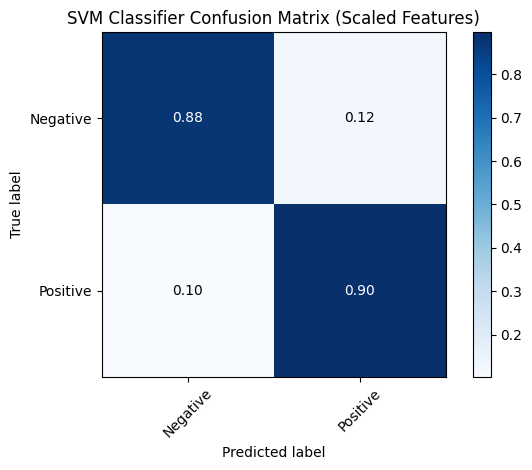

In [47]:
cm = svm_classifier(X_train_standard_scaled, y_train, X_test_standard_scaled, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'SVM Classifier Confusion Matrix (Scaled Features)')

### Try Robust scaling (better when there's outliers)

In [48]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

Training accuracy:  0.8878504672897196


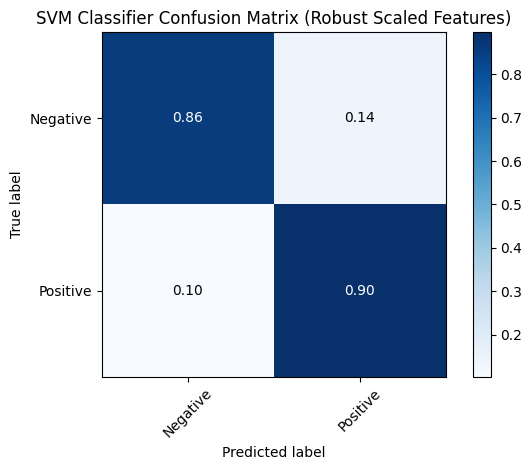

In [49]:
cm = svm_classifier(X_train_robust_scaled, y_train, X_test_robust_scaled, y_test)
plot_confusion_matrix(cm, normalize=True, title=f'SVM Classifier Confusion Matrix (Robust Scaled Features)')

# Hyperparams

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score found:  0.8582485465116279


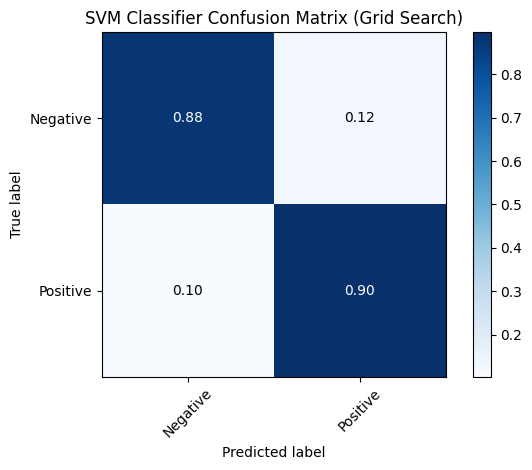

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, n_jobs=-1, verbose=1, cv=StratifiedKFold(n_splits=5))

grid.fit(X_train_standard_scaled, y_train)
print("Best parameters found: ", grid.best_params_)
print("Best score found: ", grid.best_score_)

y_pred = grid.predict(X_test_standard_scaled)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, normalize=True, title=f'SVM Classifier Confusion Matrix (Grid Search)')